Visión por Computadora I

Trabajo Práctico N° 1

- Parte 1 (imágenes en `/white_patch`  y `/coord_cromaticas`):
    1. Implementar el algoritmo de pasaje a coordenadas cromáticas para librarnos de las variaciones de contraste.
    2. Implementar el algoritmo White Patch para librarnos de las diferencias de color de iluminación.
    3. Mostrar los resultados obtenidos y analizar las posibles fallas (si es que las hay) en el caso de White patch.

- Parte 2:
    1. Para las imágenes img1_tp.png y img2_tp.png leerlas con OpenCV en escala de grisas y visualizarlas.
    2. Elija el numero de bins que crea conveniente y grafique su histograma, compare los histogramas entre si.
    Explicar lo que se observa, si tuviera que entrenar un modelo de clasificación/detección de imágenes, considera que puede ser de utilidad tomar como ‘features’ a los histogramas?
    3. Para la imagen segmentacion.png analice el histograma de los canales RGB. Segmente algunos de los elementos presentes en la imagen (agua, cielo, tierra) y muestre, aplicando mascaras, las regiones en imágenes separadas.

### Parte 1.1

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import sys

In [2]:
# mostrar version de python
print("Version de python: ", sys.version)
# mostrar version de opencv
print("Version de opencv: ", cv2.__version__)

Version de python:  3.8.18 (default, Aug 25 2023, 13:20:30) 
[GCC 11.4.0]
Version de opencv:  4.9.0


In [3]:
# 1.1
# Crear una función que convierta un color RGB a coordenadas cromáticas
def rgb_a_cromaticas(r, g, b):
    r_normalizado = r / 255.0
    g_normalizado = g / 255.0
    b_normalizado = b / 255.0

    denominador = r_normalizado + g_normalizado + b_normalizado

    if denominador != 0:
        x = r_normalizado / denominador
        y = g_normalizado / denominador
    else:
        x, y = 0, 0

    return x, y


In [4]:
# Directorio con las imágenes
directorio_coord = "../data/coord_cromaticas"

# Verificar si la ruta es válida
if os.path.exists(directorio_coord):
    # Listar todos los archivos en el directorio
    archivos_coord = os.listdir(directorio_coord)

    # Filtrar solo los archivos (excluir subdirectorios)
    archivos_coord = [archivo for archivo in archivos_coord if os.path.isfile(os.path.join(directorio_coord, archivo))]
    archivos_coord.sort()
else:
    print(f"La ruta '{directorio_coord}' no es válida.")

print(archivos_coord)

['CoordCrom_1.png', 'CoordCrom_2.png', 'CoordCrom_3.png']


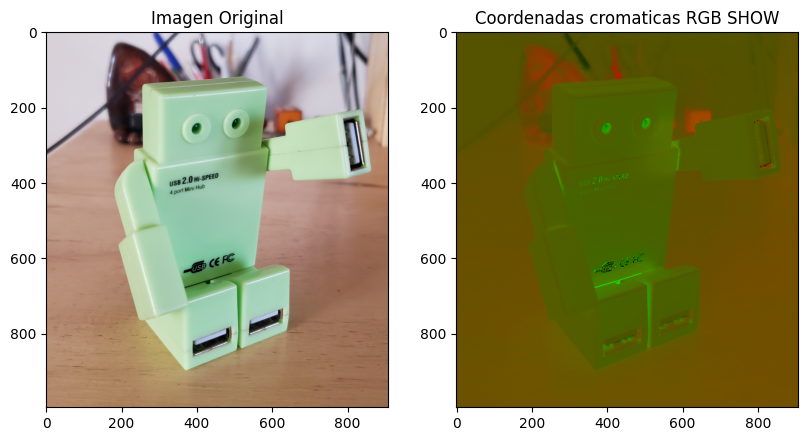

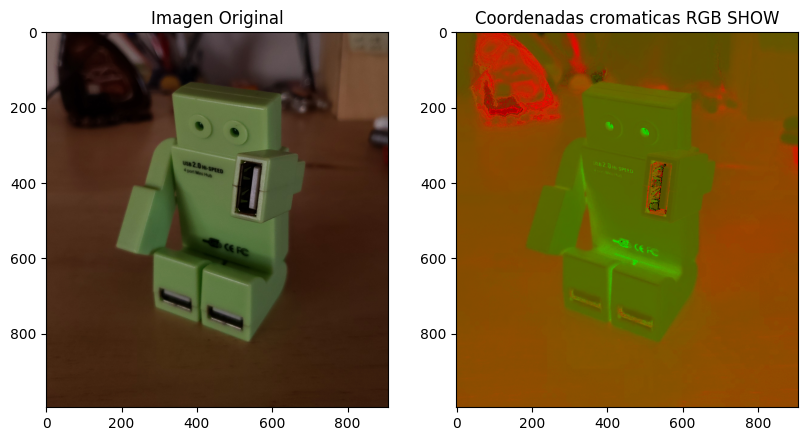

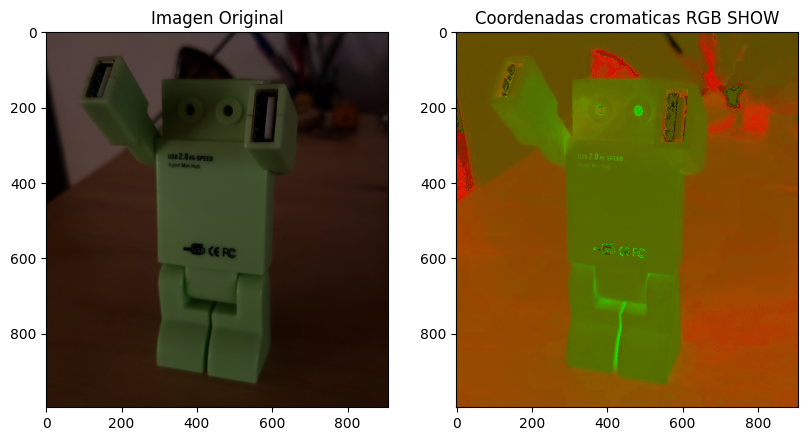

In [5]:
for archivo in archivos_coord:
    # Cargar la imagen original
    imagen = cv2.imread(os.path.join(directorio_coord, archivo))

    # Obtener las dimensiones de la imagen
    alto, ancho, _ = imagen.shape

    # Crear una matriz para almacenar las coordenadas cromáticas
    coordenadas_cromaticas = np.zeros((alto, ancho, 2), dtype=np.float32)

    # Aplicar la conversión a coordenadas cromáticas a cada píxel
    for i in range(alto):
        for j in range(ancho):
            b, g, r = imagen[i, j]
            x, y = rgb_a_cromaticas(r, g, b)
            coordenadas_cromaticas[i, j] = [x, y]

    # Crear una versión de coordenadas cromáticas con tres canales
    coordenadas_cromaticas_rgb = np.zeros((alto, ancho, 3), dtype=np.float32)
    coordenadas_cromaticas_rgb[:, :, 0:2] = coordenadas_cromaticas

    # Multiplicar las coordenadas cromáticas por 255
    coordenadas_cromaticas_rgb_show = (coordenadas_cromaticas_rgb * 255).astype(np.uint8)

    # Usar la función cv2.merge para combinar los canales correctamente
    coordenadas_cromaticas_bgr_show = cv2.merge(
        [
            coordenadas_cromaticas_rgb_show[:, :, 2],
            coordenadas_cromaticas_rgb_show[:, :, 1],
            coordenadas_cromaticas_rgb_show[:, :, 0],
        ]
    )

    # Ajustar la disposición de las subgráficas
    plt.figure(figsize=(15, 5))

    # Visualizar la imagen original y las coordenadas cromáticas
    plt.subplot(1, 3, 1)
    plt.imshow(cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB))
    plt.title("Imagen Original")

    plt.subplot(1, 3, 2)
    plt.imshow(coordenadas_cromaticas_rgb_show)
    plt.title("Coordenadas cromaticas RGB SHOW")

    # plt.subplot(1, 3, 3)
    # plt.imshow(coordenadas_cromaticas_bgr_show)
    # plt.title("Coordenadas cromáticas BGR SHOW")

    plt.show()

    # Visualizar la imagen original y las coordenadas cromáticas
    # cv2.imshow("Imagen Original", imagen)
    # cv2.imshow("Coordenadas cromaticas", coordenadas_cromaticas_bgr_show)
    # cv2.waitKey(0)
    # cv2.destroyAllWindows()

### Parte 1.2

In [6]:
# 1.2
# Algoritmo de balance de blancos
def white_patch(img):
    # Dividir cada canal por el valor máximo en ese canal
    max_values = np.max(img, axis=(0, 1))
    img_white_balanced = img / max_values

    # Asegurarse de que los valores estén en el rango [0, 1]
    img_white_balanced = np.clip(img_white_balanced, 0, 1)

    return img_white_balanced



In [7]:
# Directorio con las imágenes
directorio_white = "../data/white_patch/"

# Verificar si la ruta es válida
if os.path.exists(directorio_white):
    # Listar todos los archivos en el directorio
    archivos_white = os.listdir(directorio_white)

    # Filtrar solo los archivos (excluir subdirectorios)
    archivos_white = [archivo for archivo in archivos_white if os.path.isfile(os.path.join(directorio_white, archivo))]
    archivos_white.sort()
else:
    print(f"La ruta '{directorio_white}' no es válida.")

print(archivos_white)

['test_blue.png', 'test_green.png', 'test_red.png', 'wp_blue.jpg', 'wp_green.png', 'wp_green2.jpg', 'wp_red.png', 'wp_red2.jpg']


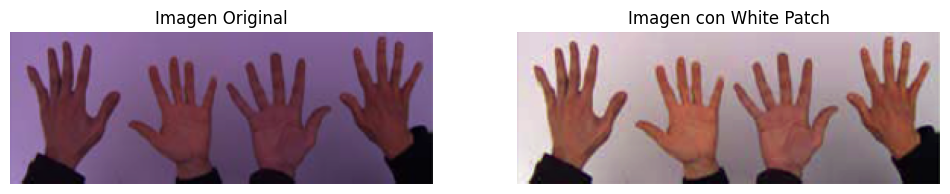

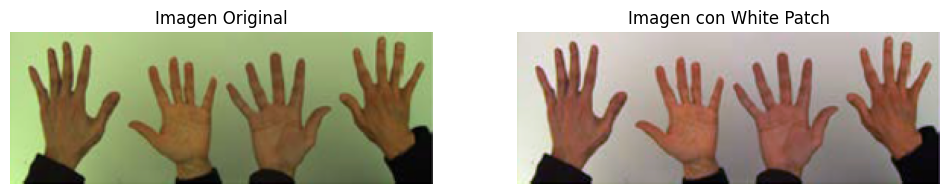

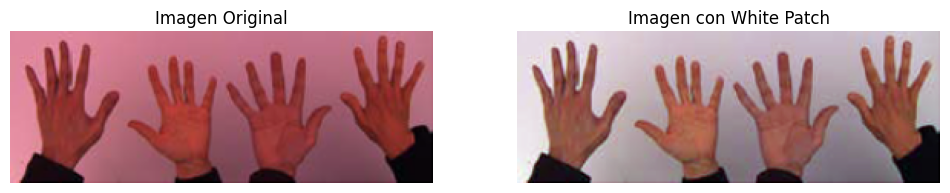

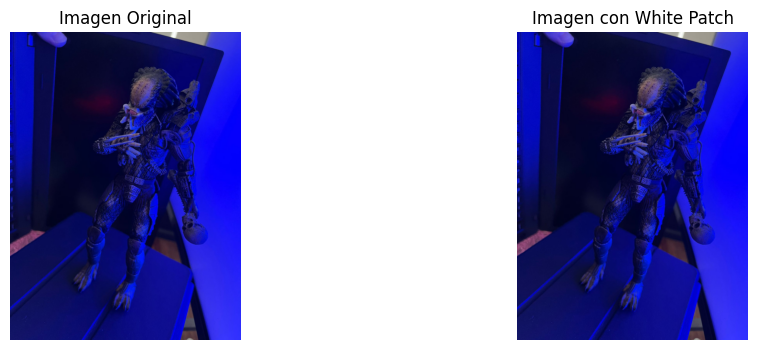

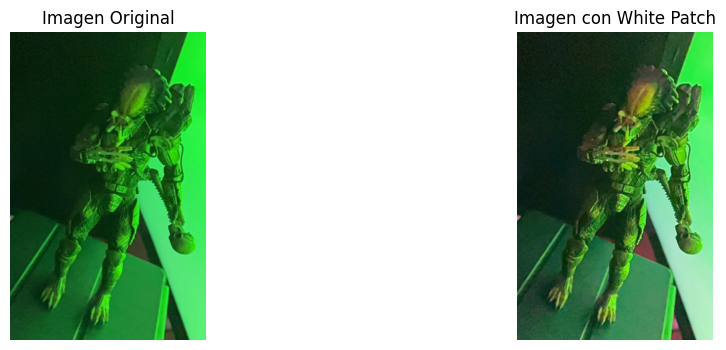

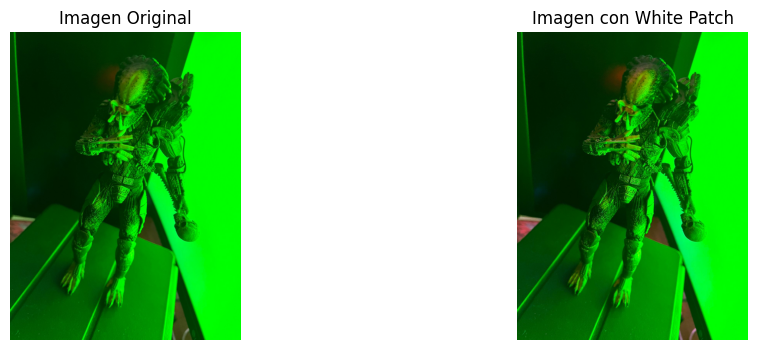

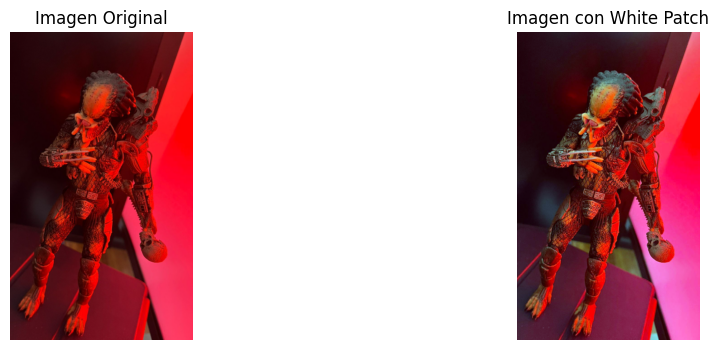

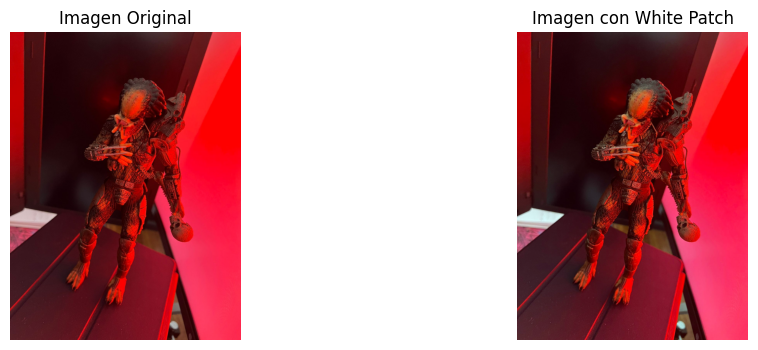

In [8]:

for archivo in archivos_white:
    # Cargar la imagen original
    imagen = cv2.imread(os.path.join(directorio_white, archivo))

    # Aplicar el algoritmo White Patch a la imagen
    imagen_white_balanced = white_patch(imagen)

    # Ajustar la disposición de las subgráficas
    plt.figure(figsize=(12, 4))

    # Visualizar la imagen original y la imagen con White Patch
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB))
    plt.title("Imagen Original")
    plt.axis("off")

    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor((imagen_white_balanced * 255).astype(np.uint8), cv2.COLOR_BGR2RGB))
    plt.title("Imagen con White Patch")
    plt.axis("off")

    plt.show()



### Parte 2.1

Tamaño imagen: (288, 287) pix


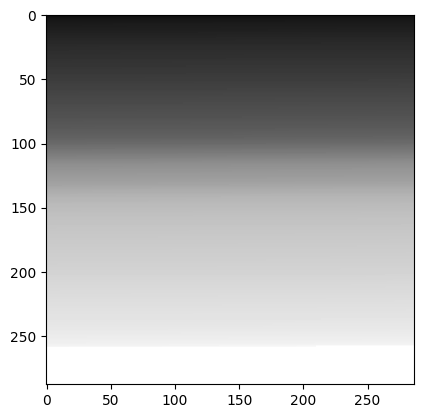

In [9]:
directorio_data = "../data"


# Cargar una imagen en modo monocromático (un canal)
img_1 = cv2.imread(os.path.join(directorio_data, 'img1_tp.png'), cv2.IMREAD_GRAYSCALE)

# Dimensión de la imagen
print(f'Tamaño imagen: {img_1.shape} pix')

# Muestro la imagen con matplotlib
plt.figure()
plt.imshow(img_1, cmap='gray')
plt.show()

In [10]:
# Visualizamos con funciones de opencv
cv2.imshow('Imagen con openCV', img_1)
# El programa cierra la ventana al presionar cualquie tecla
cv2.waitKey(0) 
cv2.destroyAllWindows()

Tamaño imagen: (288, 287) pix


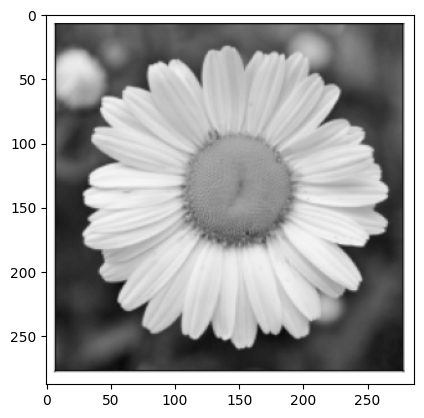

In [11]:
# Cargar una imagen en modo monocromático (un canal)
img_2 = cv2.imread(os.path.join(directorio_data, 'img2_tp.png'), cv2.IMREAD_GRAYSCALE)

# Dimensión de la imagen
print(f'Tamaño imagen: {img_2.shape} pix')

# Muestro la imagen con matplotlib
plt.figure()
plt.imshow(img_2, cmap='gray')
plt.show()

In [12]:
# Visualizamos con funciones de opencv
cv2.imshow('Imagen con openCV', img_2)
# El programa cierra la ventana al presionar cualquie tecla
cv2.waitKey(0) 
cv2.destroyAllWindows()

### Parte 2.2

#### Graficamos histogramas segun diferentes bins para la primera imagen

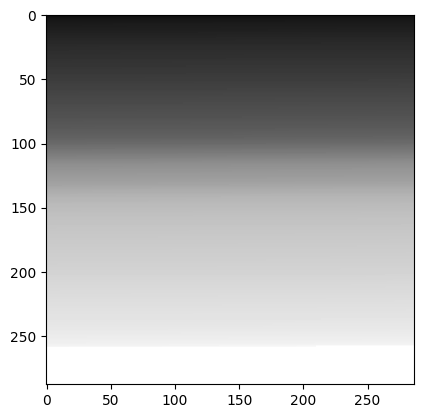

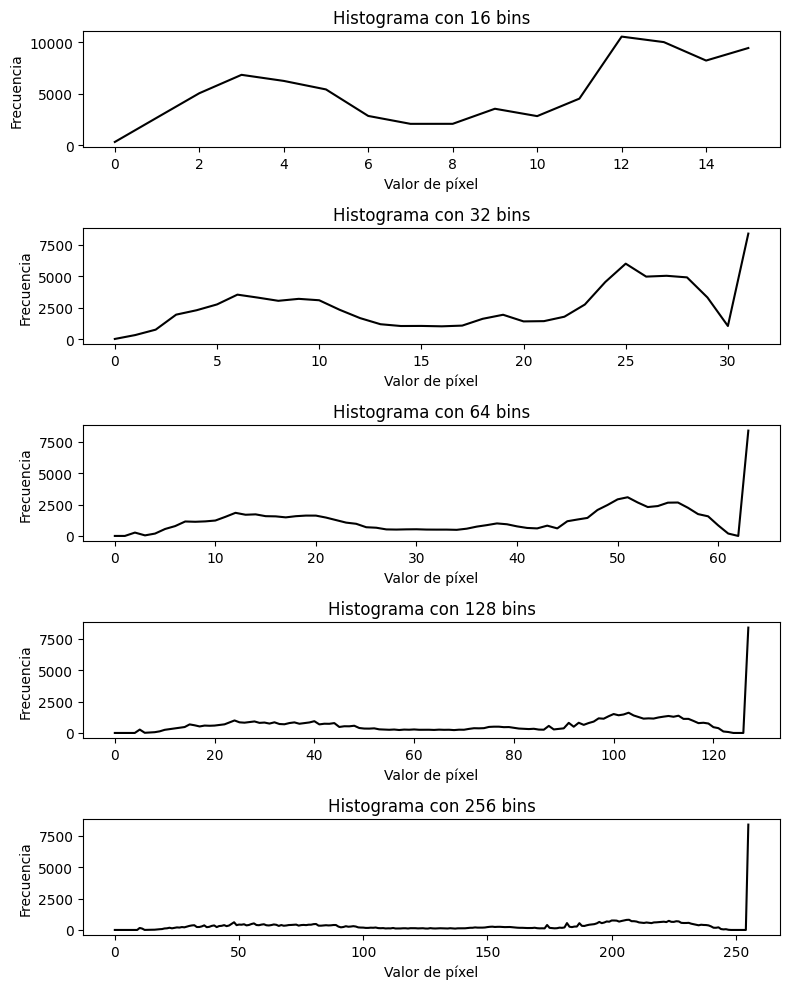

In [13]:
lista_bins = [16, 32, 64, 128, 256]

# Cargar la imagen
#img_1 = cv2.imread(os.path.join(directorio_data, 'img1_tp.png'), cv2.IMREAD_GRAYSCALE)

# Muestro la imagen con matplotlib
plt.figure()
plt.imshow(img_1, cmap='gray')
plt.show()

# Crear subgráficos
num_bins = len(lista_bins)
fig, axs = plt.subplots(num_bins, 1, figsize=(8, 2 * num_bins))

# Calcular y mostrar el histograma para cada cantidad de bins usando NumPy
for i, bins in enumerate(lista_bins):
    histograma_1, bordes = np.histogram(img_1, bins=bins, range=[0, 256])
    axs[i].plot(histograma_1, color='black')
    axs[i].set_title(f'Histograma con {bins} bins')
    axs[i].set_xlabel('Valor de píxel')
    axs[i].set_ylabel('Frecuencia')

# Ajustar el diseño y mostrar los subgráficos
plt.tight_layout()
plt.show()



#### Graficamos histogramas segun diferentes bins para la segunda imagen

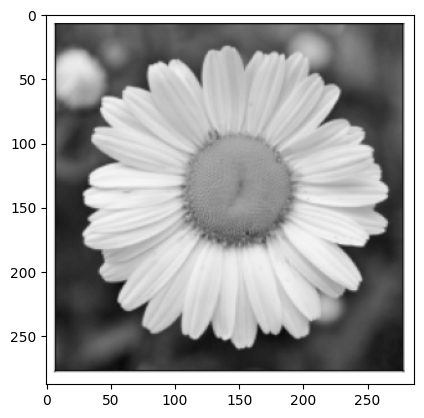

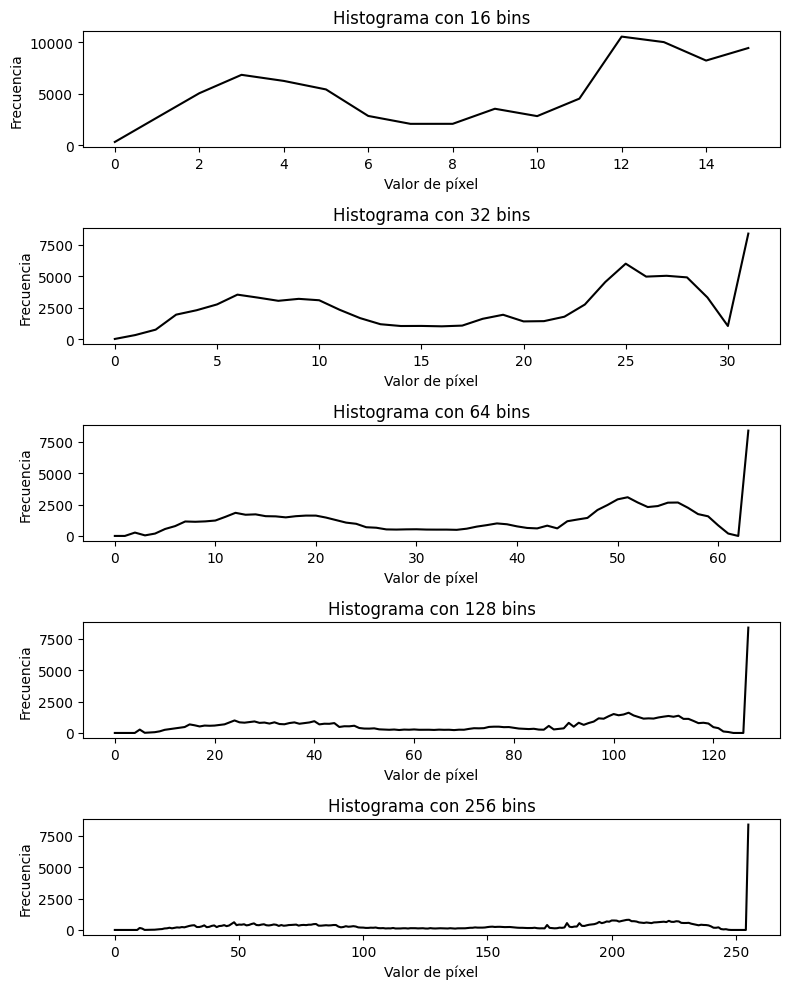

In [14]:
lista_bins = [16, 32, 64, 128, 256]

# Cargar la imagen
#img_2 = cv2.imread(os.path.join(directorio_data, 'img2_tp.png'), cv2.IMREAD_GRAYSCALE)

# Muestro la imagen con matplotlib
plt.figure()
plt.imshow(img_2, cmap='gray')
plt.show()

# Crear subgráficos
num_bins = len(lista_bins)
fig, axs = plt.subplots(num_bins, 1, figsize=(8, 2 * num_bins))

# Calcular y mostrar el histograma para cada cantidad de bins usando NumPy
for i, bins in enumerate(lista_bins):
    histograma_2, bordes = np.histogram(img_2, bins=bins, range=[0, 256])
    axs[i].plot(histograma_2, color='black')
    axs[i].set_title(f'Histograma con {bins} bins')
    axs[i].set_xlabel('Valor de píxel')
    axs[i].set_ylabel('Frecuencia')

# Ajustar el diseño y mostrar los subgráficos
plt.tight_layout()
plt.show()

Según lo que podemos ver si usamos mas de 64 bins se observa que tiene mas predominancia de la imagen a ser mas intensa en brillo. Por ejemplo en el ultimo histograma puede verse que posee mas frecuencia los pixeles que se encuentran mas a la derecha o sea que son mas claros.
En general los histogramas son de tendencia similar.

El uso de histogramas como "features" puede servir en la tarea de entrenar modelos de clasificación/detección de imágenes, dependiendo del contexto. Sin embargo en este caso de las dos imagenes totalmente diferentes sus histogramas son iguales. En este caso, se necesitarían características adicionales para mejorar la capacidad de discriminación del modelo. Por ejemplo podría incluir descriptores locales, características de textura, información espacial, entre otros.
En otras palabras, aunque con histogramas idénticos pueden indicar similitudes visuales, no garantizan que las imágenes sean idénticas en contenido. En tareas de clasificación/detección de imágenes, siempre es beneficioso explorar y utilizar una variedad de características para lograr un rendimiento óptimo del modelo.

### Parte 2.3

Tamaño imagen: (628, 953, 3) pix


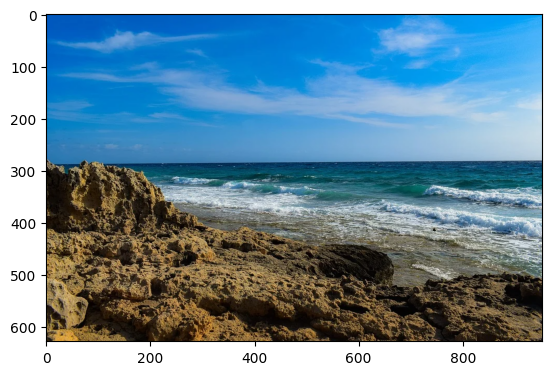

In [17]:
# Cargar la imagen para la segmentacion
img_color = cv2.imread(os.path.join(directorio_data, 'segmentacion.png'))

imgRGB = cv2.cvtColor(img_color, cv2.COLOR_BGR2RGB)

print(f'Tamaño imagen: {imgRGB.shape} pix')

# Muestro la imagen con matplotlib
plt.figure(1)
plt.imshow(imgRGB)
plt.show()


#### Segmentación del cielo

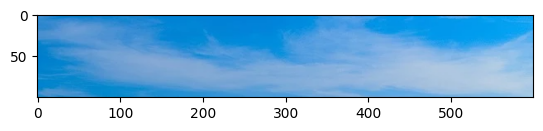

In [56]:
# Tomamos una muestra del cielo
img_muestra = imgRGB[100:200, 200:800,:]
plt.figure(2)
plt.imshow(img_muestra)
plt.show()

In [57]:
# Calculamos un modelo estadístico sencillo para caracterizar el color del cielo en el espacio RGB
color_mean, color_std = cv2.meanStdDev(img_muestra)
print(color_mean.flatten().tolist())
print(color_std.flatten().tolist())

[79.149, 159.9009, 219.73133333333334]
[55.438135180878284, 19.85528844388817, 9.99040130436326]


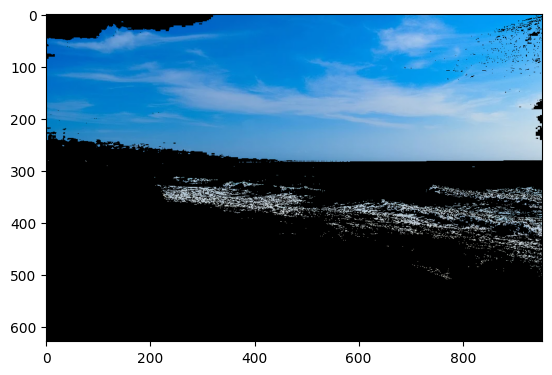

<function matplotlib.pyplot.show(close=None, block=None)>

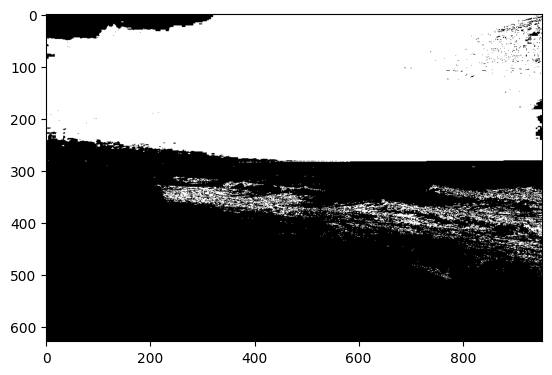

In [58]:
# Pintemos de blanco los puntos que estén cerca de la media en un radio menor que 3 sigmas
# para ¨capturar¨ el 99.7 % de pixeles.
n_sigma = 3
mask = cv2.inRange(imgRGB, color_mean-color_std * n_sigma,  color_mean+color_std * n_sigma)
img_segmentada = cv2.bitwise_and(imgRGB, imgRGB, mask=mask)

plt.figure(3)
plt.imshow(img_segmentada)
plt.show()

plt.figure(4)
plt.imshow(mask,cmap='gray')
plt.show

Veamos la distribucion de colores

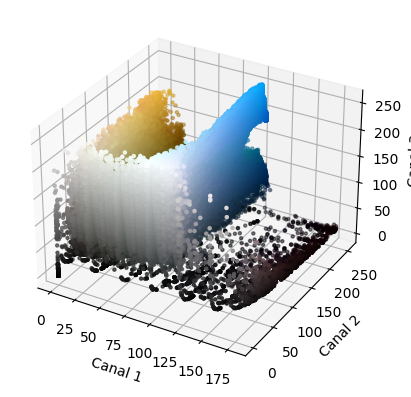

In [59]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib import colors

img_HSV = cv2.cvtColor(img_color, cv2.COLOR_BGR2HSV)
c1, c2, c3 = cv2.split(img_HSV)

# c1, c2, c3 = cv.split(imgRGB)

fig = plt.figure()
axis = fig.add_subplot(1, 1, 1, projection="3d")

pixel_colors = imgRGB.reshape((np.shape(imgRGB)[0]*np.shape(imgRGB)[1], 3))
norm = colors.Normalize(vmin=-1.,vmax=1.)
norm.autoscale(pixel_colors)
pixel_colors = norm(pixel_colors).tolist()

axis.scatter(c1.flatten(), c2.flatten(), c3.flatten(), facecolors=pixel_colors, marker=".")
axis.set_xlabel("Canal 1")
axis.set_ylabel("Canal 2")
axis.set_zlabel("Canal 3")
plt.show()

(103.37563333333334, 163.49425, 219.73133333333334, 0.0)


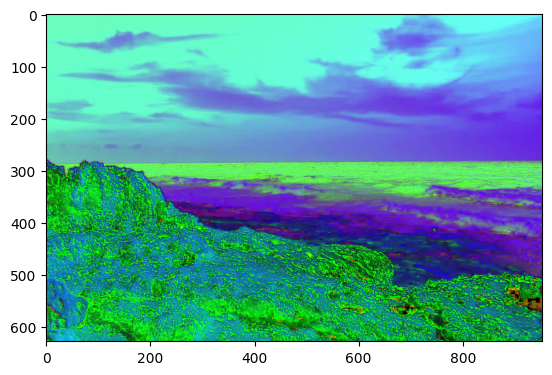

In [60]:
# Pasamos la imagen a HSV y calculo el color de muestra

img_HSV = cv2.cvtColor(img_color, cv2.COLOR_BGR2HSV)
plt.figure(5)
plt.imshow(img_HSV)

#img_muestra = img_HSV[100:150,325:375,:]
#img_muestra_hsv = img_HSV[230:280,230:280,:]
#img_muestra_hsv = img_HSV[0:250, 0:9530,:]
#img_muestra_hsv = img_HSV[50:150, 250:450,:]
img_muestra_hsv = img_HSV[100:200, 200:800,:]

# Calculamos un modelo estadístico sencillo para caracterizar el color del cielo en el espacio RGB
color_mean = cv2.mean(img_muestra_hsv)
    
print(color_mean)

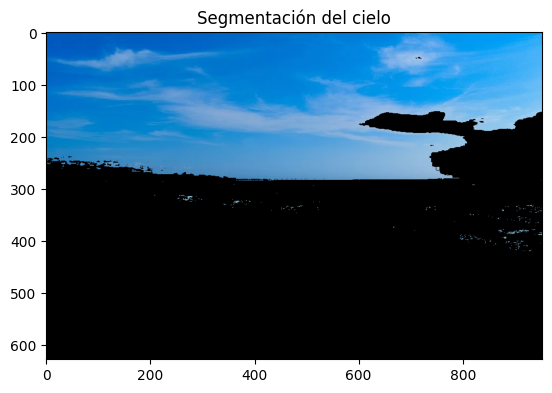

In [77]:
color_l = (95,80,185)
color_u = (110,255,255)

mask = cv2.inRange(img_HSV, color_l,  color_u)
img_segmentada = cv2.bitwise_and(imgRGB, imgRGB, mask=mask)


plt.figure(6)
plt.title('Segmentación del cielo')
plt.imshow(img_segmentada)
plt.show()

#### Segmentación del mar

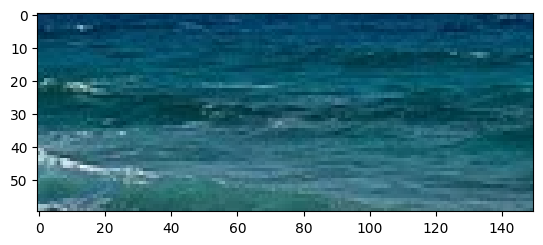

In [92]:
# Tomamos una muestra del mar
img_muestra = imgRGB[290:350, 500:650,:]
plt.figure(2)
plt.imshow(img_muestra)
plt.show()

In [93]:
# Calculamos un modelo estadístico sencillo para caracterizar el color del mar en el espacio RGB
color_mean, color_std = cv2.meanStdDev(img_muestra)
print(color_mean.flatten().tolist())
print(color_std.flatten().tolist())

[29.43077777777778, 92.41033333333334, 109.89755555555556]
[29.51036893958829, 24.99931029937515, 22.22980868169342]


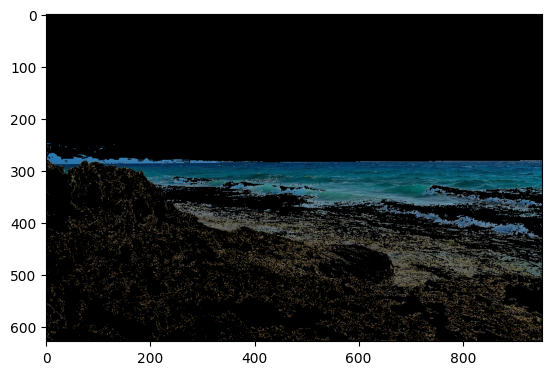

<function matplotlib.pyplot.show(close=None, block=None)>

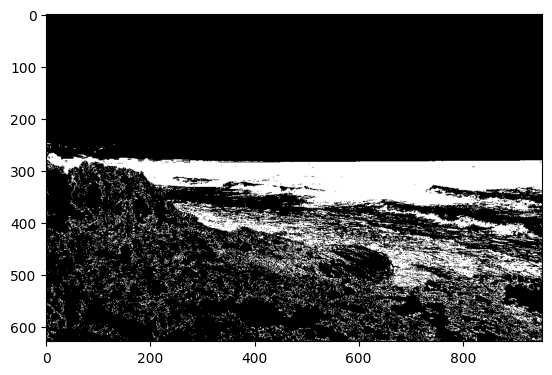

In [94]:
# Pintemos de blanco los puntos que estén cerca de la media en un radio menor que 3 sigmas
# para ¨capturar¨ el 99.7 % de pixeles.
n_sigma = 3
mask = cv2.inRange(imgRGB, color_mean-color_std * n_sigma,  color_mean+color_std * n_sigma)
img_segmentada = cv2.bitwise_and(imgRGB, imgRGB, mask=mask)

plt.figure(3)
plt.imshow(img_segmentada)
plt.show()

plt.figure(4)
plt.imshow(mask,cmap='gray')
plt.show

(95.67982954545455, 120.37113636363637, 136.25289772727274, 0.0)


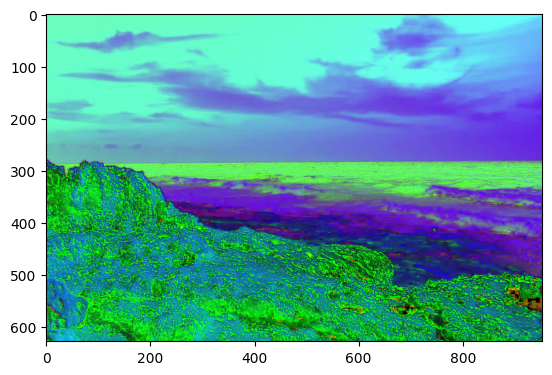

In [95]:
# Pasamos la imagen a HSV y calculo el color de muestra

img_HSV = cv2.cvtColor(img_color, cv2.COLOR_BGR2HSV)
plt.figure(5)
plt.imshow(img_HSV)

img_muestra_hsv = img_HSV[310:390, 480:700,:]

# Calculamos un modelo estadístico sencillo para caracterizar el color del cielo en el espacio RGB
color_mean = cv2.mean(img_muestra_hsv)
    
print(color_mean)

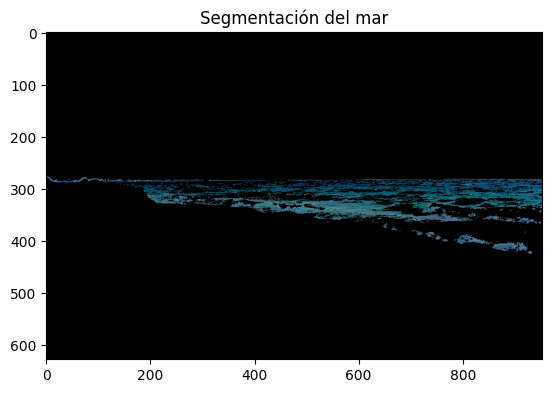

In [123]:
color_l = (85,100,100)
color_u = (120,255,170)

mask = cv2.inRange(img_HSV, color_l,  color_u)
img_segmentada = cv2.bitwise_and(imgRGB, imgRGB, mask=mask)


plt.figure(6)
plt.title('Segmentación del mar')
plt.imshow(img_segmentada)
plt.show()

#### Segmentación de la tierra

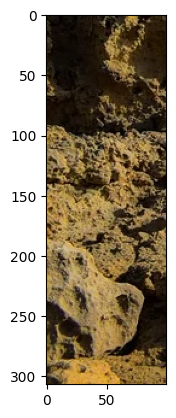

In [131]:
# Tomamos una muestra de la tierra
img_muestra = imgRGB[320:627, 0:100,:]
plt.figure(2)
plt.imshow(img_muestra)
plt.show()

In [132]:
# Calculamos un modelo estadístico sencillo para caracterizar el color del cielo en el espacio RGB
color_mean, color_std = cv2.meanStdDev(img_muestra)
print(color_mean.flatten().tolist())
print(color_std.flatten().tolist())

[98.96081433224755, 78.27224755700325, 44.480065146579804]
[63.87926923324456, 55.57789338450349, 37.745484360017194]


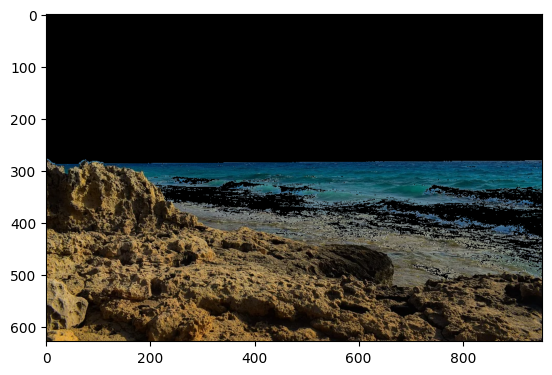

<function matplotlib.pyplot.show(close=None, block=None)>

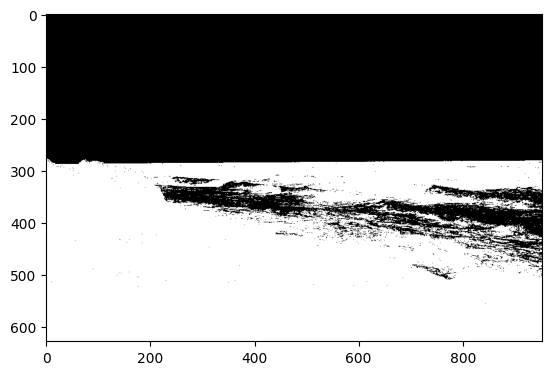

In [133]:
# Pintemos de blanco los puntos que estén cerca de la media en un radio menor que 3 sigmas
# para ¨capturar¨ el 99.7 % de pixeles.
n_sigma = 3
mask = cv2.inRange(imgRGB, color_mean-color_std * n_sigma,  color_mean+color_std * n_sigma)
img_segmentada = cv2.bitwise_and(imgRGB, imgRGB, mask=mask)

plt.figure(3)
plt.imshow(img_segmentada)
plt.show()

plt.figure(4)
plt.imshow(mask,cmap='gray')
plt.show

(18.160260586319218, 157.66442996742668, 98.96560260586318, 0.0)


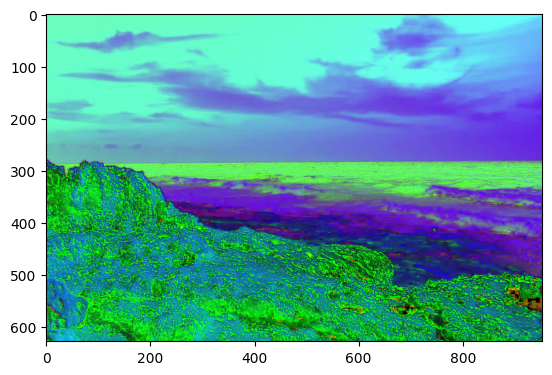

In [134]:
# Pasamos la imagen a HSV y calculo el color de muestra

img_HSV = cv2.cvtColor(img_color, cv2.COLOR_BGR2HSV)
plt.figure(5)
plt.imshow(img_HSV)

img_muestra_hsv = img_HSV[320:627, 0:100,:]

# Calculamos un modelo estadístico sencillo para caracterizar el color del cielo en el espacio RGB
color_mean = cv2.mean(img_muestra_hsv)
    
print(color_mean)

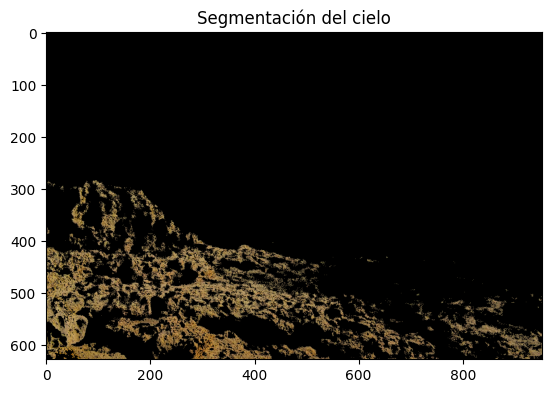

In [160]:
color_l = (10,90,90)
color_u = (30,255,200)

mask = cv2.inRange(img_HSV, color_l,  color_u)
img_segmentada = cv2.bitwise_and(imgRGB, imgRGB, mask=mask)


plt.figure(6)
plt.title('Segmentación del cielo')
plt.imshow(img_segmentada)
plt.show()